In [42]:
# Importamos as bibliotecas necessárias para o código:

# `pandas`: Biblioteca essencial para manipulação e análise de dados em formato de tabelas (DataFrames).
import pandas as pd

# `numpy`: Biblioteca fundamental para operações numéricas e manipulação de arrays.
import numpy as np

# `matplotlib.pyplot`: Biblioteca usada para criar gráficos e visualizações. A função `pyplot` oferece uma interface simples para gerar gráficos.
import matplotlib.pyplot as plt

# `seaborn`: Biblioteca baseada no matplotlib para criar gráficos estatísticos mais sofisticados e visualmente atraentes.
import seaborn as sns

In [43]:
# Definimos uma semente para a geração de números aleatórios com o valor '48' para garantir a reprodutibilidade do processo de amostragem.
numero_email = 48

# Carregamos os dados do arquivo CSV ('dad600.acad3.csv') para um DataFrame usando a função `read_csv` do pandas.
df = pd.read_csv(r'dad600.acad3.csv')

# Realizamos uma amostragem aleatória de 100 linhas do DataFrame 'df', com a semente do número aleatório definido acima.
# O parâmetro 'random_state' assegura que a amostragem seja consistente toda vez que o código for executado, gerando a mesma amostra.
df_sample = df.sample(n=100, random_state=numero_email)

In [44]:
# Contamos a frequência de cada valor na coluna 'E.Civil' do DataFrame 'df_sample' usando o método `value_counts`.
# O resultado é uma Série com os valores únicos encontrados na coluna e suas respectivas contagens.
ecivil = df_sample["E.Civil"].value_counts()
display(ecivil)

E.Civil
casado        52
solteiro      27
divorciado    13
viuvo          8
Name: count, dtype: int64

In [45]:
# Conta a frequência absoluta de cada categoria na coluna "E.Civil" do DataFrame df_sample
# e transforma a Series resultante em um novo DataFrame com índices resetados
ecivil = df_sample["E.Civil"].value_counts().reset_index()

# Renomeia as colunas do novo DataFrame para "E.Civil" (categoria) e "count" (frequência absoluta)
ecivil.columns = ["E.Civil", "count"]

# Cria uma nova coluna chamada "percent", que representa a porcentagem de cada categoria
# em relação ao total de respostas (frequência relativa)
ecivil["percent"] = ecivil["count"] / ecivil["count"].sum()

# Exibe o DataFrame resultante com as colunas: categoria, frequência absoluta e relativa
display(ecivil)

,E.Civil,count,percent
0,casado,52,0.52
1,solteiro,27,0.27
2,divorciado,13,0.13
3,viuvo,8,0.08


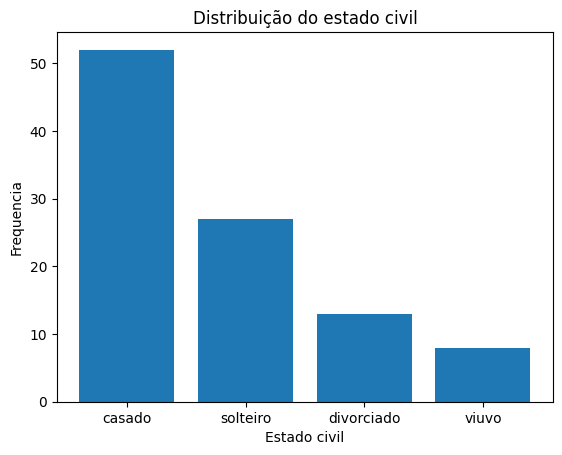

In [61]:
e2civil = df_sample["E.Civil"].value_counts()

# Definimos o título do gráfico com a função `plt.title`, que neste caso é "Distribuição do estado civil".
plt.title("Distribuição do estado civil")

# Definimos o rótulo do eixo y com a função `plt.ylabel`, indicando que este eixo representa a "Frequência" das categorias.
plt.ylabel("Frequencia")

# Definimos o rótulo do eixo x com a função `plt.xlabel`, indicando que este eixo representa os diferentes "Estados civis".
plt.xlabel("Estado civil")

# Criamos um gráfico de barras com a função `plt.bar`, onde:
# - `x=ecivil.index` define as categorias do estado civil no eixo x (os valores únicos presentes na coluna 'E.Civil').
# - `height=ecivil` define as alturas das barras, que são as contagens de cada categoria (calculadas anteriormente).
plt.bar(x=e2civil.index, height=e2civil)
plt.savefig("Distribuição do estado civil.pdf",format="pdf", bbox_inches="tight")
plt.show()

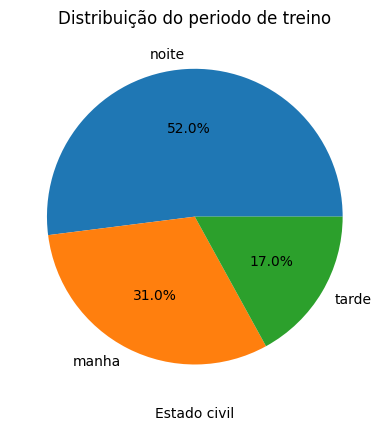

In [ ]:
ptreino = df_sample["P.Treino"].value_counts()
plt.title("Distribuição do periodo de treino")
plt.xlabel("Estado civil")
# Criamos um gráfico de pizza (pie chart) com a função `plt.pie`:
# - `ptreino`: Os dados a serem exibidos no gráfico, que representam as frequências de cada categoria na variável 'P.Treino'.
# - `labels=ptreino.index`: Define os rótulos para cada fatia do gráfico, que são os valores únicos presentes na variável 'P.Treino'.
# - `autopct='%1.1f%%'`: Formata a exibição dos percentuais para cada fatia. Aqui, `%1.1f%%` significa que o percentual será mostrado com uma casa decimal.
plt.pie(ptreino, labels=ptreino.index, autopct='%1.1f%%')
plt.savefig("Distribuição do periodo de treino.pdf",format="pdf", bbox_inches="tight")
plt.show()

In [47]:
# Conta quantas vezes cada valor aparece na variável "Freq.Sem" (frequência semanal de treino)
# e transforma o resultado em um DataFrame, com o índice sendo resetado para facilitar a manipulação
fsemanal = df_sample["Freq.Sem"].value_counts().reset_index()

# Renomeia as colunas do DataFrame para algo mais descritivo:
# "Freq.Sem" representa o número de dias por semana e "count" a frequência absoluta
fsemanal.columns = ["Freq.Sem", "count"]

# Cria uma nova coluna chamada "percent", que contém a porcentagem de cada frequência
# em relação ao total de respostas (frequência relativa)
fsemanal["percent"] = fsemanal["count"] / fsemanal["count"].sum()

# Exibe a tabela resultante, mostrando a distribuição absoluta e relativa da variável "Freq.Sem"
display(fsemanal)


,Freq.Sem,count,percent
0,3,32,0.32
1,2,24,0.24
2,4,20,0.20
3,5,13,0.13
4,1,6,0.06
5,6,5,0.05


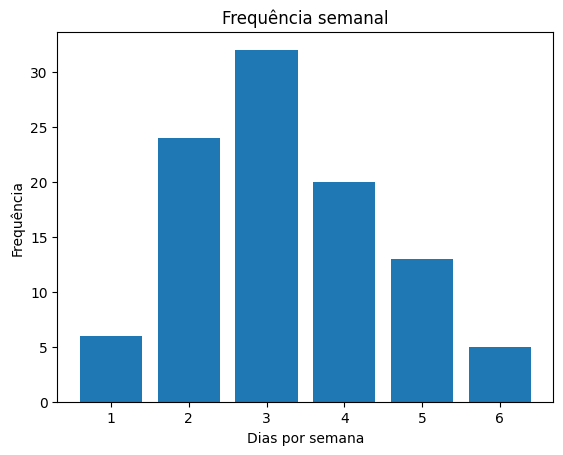

In [48]:
plt.bar(x=fsemanal["Freq.Sem"], height=fsemanal['count'])
plt.title("Frequência semanal")
plt.ylabel("Frequência")
plt.xlabel("Dias por semana")
plt.savefig("Frequência semanal.pdf",format="pdf", bbox_inches="tight")
plt.show()

In [49]:
inst = df_sample["Aval.Instal"].value_counts().reset_index()
inst.columns = ["Aval.Instal", "count"]
inst["percent"] = inst["count"] / inst["count"].sum()
display(inst)

,Aval.Instal,count,percent
0,A,47,0.47
1,Ar,32,0.32
2,r,21,0.21


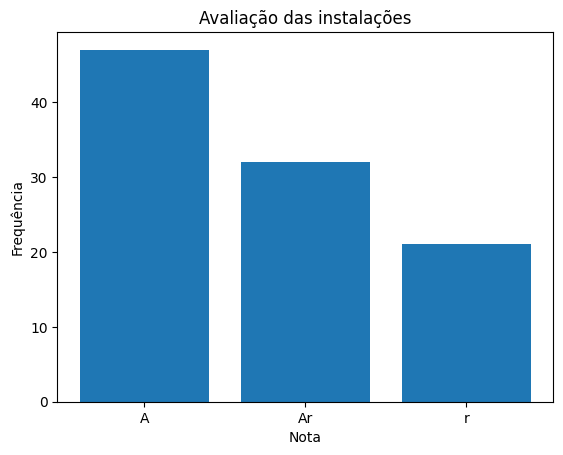

In [50]:
plt.bar(x=inst["Aval.Instal"], height=inst['count'])
plt.title("Avaliação das instalações")
plt.ylabel("Frequência")
plt.xlabel("Nota")
plt.savefig("Avaliação das instalações.pdf",format="pdf", bbox_inches="tight")
plt.show()

In [51]:
# A função `pd.crosstab` cria uma tabela de contingência (ou tabela cruzada), que exibe a relação entre duas variáveis.
# No caso, estamos cruzando as variáveis "P.Treino" (período de treino) e "E.Civil" (estado civil) da amostra `df_sample`.
# O resultado é uma tabela onde as linhas representam os diferentes períodos de treino ("P.Treino") e as colunas representam os diferentes estados civis ("E.Civil").
# As células da tabela mostram o número de ocorrências de cada combinação de "P.Treino" e "E.Civil".
cross_treino_civil = pd.crosstab(df_sample["P.Treino"], df_sample["E.Civil"])
display(cross_treino_civil)

E.Civil,casado,divorciado,solteiro,viuvo
P.Treino,,,,
manha,0,4,27,0
noite,52,0,0,0
tarde,0,9,0,8


In [52]:
# O parâmetro `normalize='all'` normaliza os valores da tabela, ou seja, converte os valores de contagem para proporções em relação ao total de observações.
pd.crosstab(df_sample["P.Treino"], df_sample["E.Civil"],normalize='all')

E.Civil,casado,divorciado,solteiro,viuvo
P.Treino,,,,
manha,0.00,0.04,0.27,0.00
noite,0.52,0.00,0.00,0.00
tarde,0.00,0.09,0.00,0.08


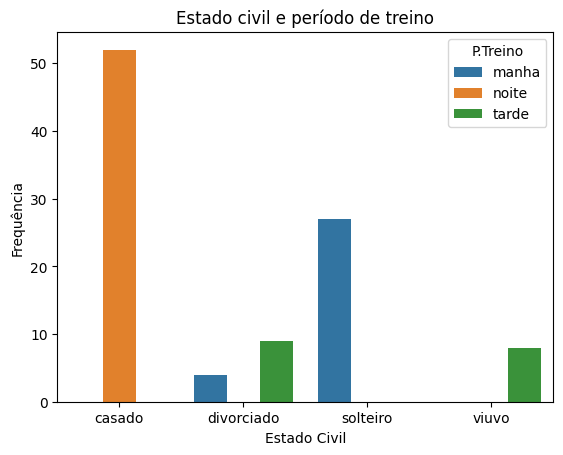

In [53]:
# Este bloco cruza duas variáveis do conjunto de dados — por exemplo, "Freq.Sem" e "Aval.Aparelhos".
# Primeiro, usamos `pd.crosstab()` para contar quantas vezes cada combinação de valores ocorre entre essas duas variáveis.
# Isso gera uma tabela de frequência absoluta, onde cada célula mostra o número de pessoas com uma determinada frequência de treino e avaliação dos aparelhos.
# Em seguida, usamos `melt()` para transformar essa tabela para o formato "longo", no qual cada linha representa uma combinação entre as variáveis e sua contagem.
col2 = "P.Treino"
col1 = "E.Civil"
cross_troca_prof = pd.crosstab(df_sample[col1],df_sample[col2])
tabela_long = cross_troca_prof.reset_index().melt(id_vars=col1, var_name=col2, value_name="Count")
sns.barplot(x=col1, y="Count", hue=col2, data=tabela_long)
plt.title("Estado civil e período de treino")
plt.xlabel("Estado Civil")
plt.ylabel("Frequência")
plt.savefig("Estado civil e período de treino.pdf",format="pdf", bbox_inches="tight")
plt.show()

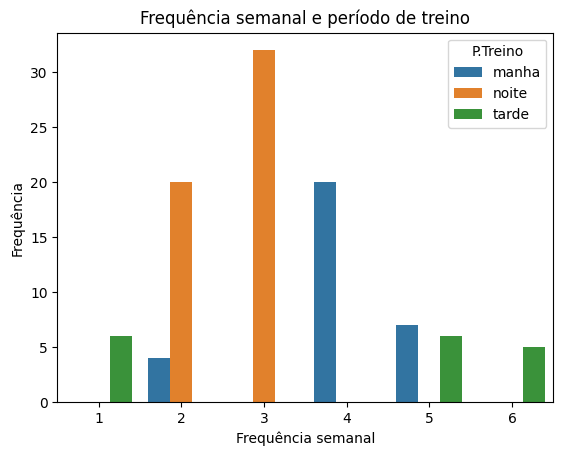

In [54]:
col2 = "P.Treino"
col1 = "Freq.Sem"
cross_troca_prof = pd.crosstab(df_sample[col1],df_sample[col2])
tabela_long = cross_troca_prof.reset_index().melt(id_vars=col1, var_name=col2, value_name="Count")
sns.barplot(x=col1, y="Count", hue=col2, data=tabela_long)
plt.title("Frequência semanal e período de treino")
plt.xlabel("Frequência semanal")
plt.ylabel("Frequência")
plt.savefig("Frequência semanal e período de treino.pdf",format="pdf", bbox_inches="tight")
plt.show()

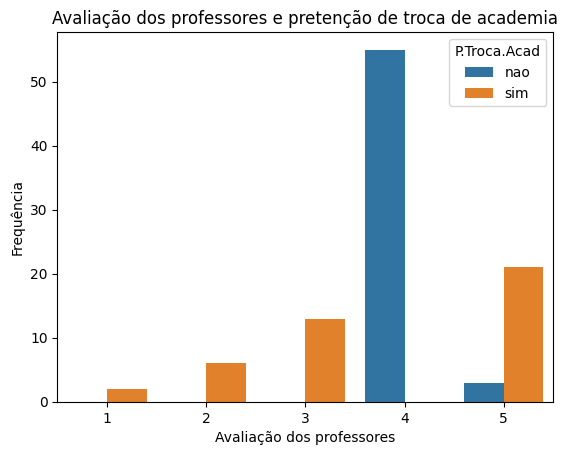

In [55]:
col2 = "P.Troca.Acad"
col1 = "Aval.Prof"
cross_troca_prof = pd.crosstab(df_sample[col1],df_sample[col2])
tabela_long = cross_troca_prof.reset_index().melt(id_vars=col1, var_name=col2, value_name="Count")
sns.barplot(x=col1, y="Count", hue=col2, data=tabela_long)
plt.title("Avaliação dos professores e pretenção de troca de academia")
plt.xlabel("Avaliação dos professores")
plt.ylabel("Frequência")
plt.savefig("Avaliação dos professores e pretenção de troca de academia.pdf",format="pdf", bbox_inches="tight")
plt.show()

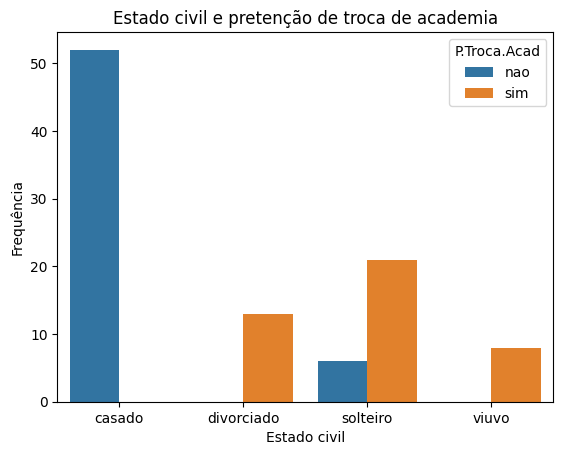

In [56]:
col2 = "P.Troca.Acad"
col1 = "E.Civil"
cross_troca_prof = pd.crosstab(df_sample[col1],df_sample[col2])
tabela_long = cross_troca_prof.reset_index().melt(id_vars=col1, var_name=col2, value_name="Count")
sns.barplot(x=col1, y="Count", hue=col2, data=tabela_long)
plt.title("Estado civil e pretenção de troca de academia")
plt.xlabel("Estado civil")
plt.ylabel("Frequência")
plt.savefig("Estado civil e pretenção de troca de academia.pdf",format="pdf", bbox_inches="tight")
plt.show()

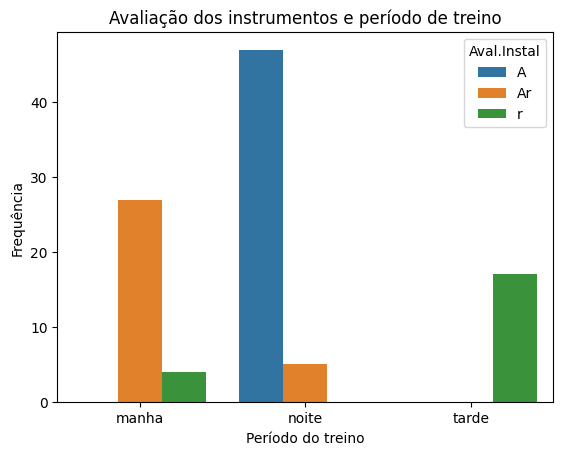

In [57]:
col2 = "Aval.Instal"
col1 = "P.Treino"
cross_troca_prof = pd.crosstab(df_sample[col1],df_sample[col2])
tabela_long = cross_troca_prof.reset_index().melt(id_vars=col1, var_name=col2, value_name="Count")
sns.barplot(x=col1, y="Count", hue=col2, data=tabela_long)
plt.title("Avaliação dos instrumentos e período de treino")
plt.xlabel("Período do treino")
plt.ylabel("Frequência")
plt.savefig("Avaliação dos instrumentos e período de treino.pdf",format="pdf", bbox_inches="tight")
plt.show()

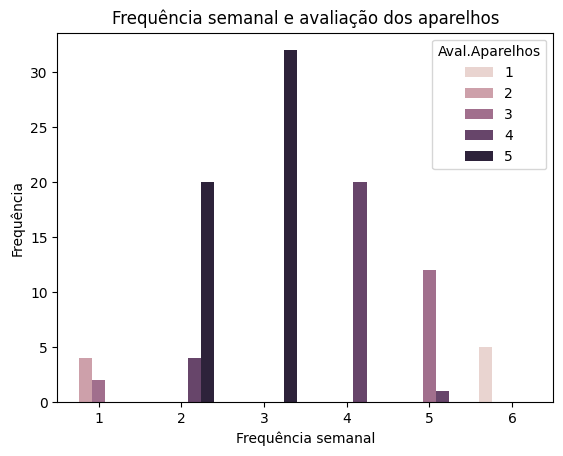

In [58]:
col2 = "Aval.Aparelhos"
col1 = "Freq.Sem"
cross_troca_prof = pd.crosstab(df_sample[col1],df_sample[col2])
tabela_long = cross_troca_prof.reset_index().melt(id_vars=col1, var_name=col2, value_name="Count")
sns.barplot(x=col1, y="Count", hue=col2, data=tabela_long)
plt.title("Frequência semanal e avaliação dos aparelhos")
plt.xlabel("Frequência semanal")
plt.ylabel("Frequência")
plt.savefig("Frequência semanal e avaliação dos aparelhos.pdf",format="pdf", bbox_inches="tight")
plt.show()